# Analysis of Foursquare Model Weight
# NYU - CUSP UDP Capstone
# Foursquare + TWITTER + CENSUS NYC Merge by CT 
## Brief
This notebook 
1. Part I. Data Processing
    - import Models Weight
    - Plot top 10 most important weights for every model
    
###  You can refer to https://github.com/mv1742/updny_2

# Part I. Data Processing


In [1]:
import os
import requests
import shapely
import json

import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stat
#make sure plots are embedded into the notebook
%matplotlib inline
#import statsmodels.formula.api as smf
import itertools
import geopandas as gpd
from shapely.geometry import Point, Polygon
from sklearn.metrics import silhouette_score
# from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl
import pandas as pd
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage  # for hierarchical clustering
from scipy.cluster.hierarchy import fcluster
# from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl
import pandas as pd
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage  # for hierarchical clustering
from scipy.cluster.hierarchy import fcluster
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import geopandas as gpd
import pylab as pl
import io
import pylab as pl

from geopandas import GeoDataFrame
from geopandas.tools import sjoin
try:
    import ipywidgets as widgets
    hasWidgets = True
except ImportError:
    hasWidgets = False
from sklearn.linear_model import LogisticRegression
from sklearn import svm
# from sklearn.metrics import confusion_matrix
# from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
# from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
import matplotlib.pylab
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['Polygon', 'linalg']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [15]:
weights_results = ['gent00_16.csv',\
'pct_ch_hinc00_16.csv','pct_ch_medrent00_16.csv','pct_ch_medhval00_16.csv',\
'pct_ch_percol00_16.csv',
'Supergent16.csv']
weights_results

['gent00_16.csv',
 'pct_ch_hinc00_16.csv',
 'pct_ch_medrent00_16.csv',
 'pct_ch_medhval00_16.csv',
 'pct_ch_percol00_16.csv',
 'Supergent16.csv']

In [16]:
weights_df_list = []
for file in weights_results:
    print(file)
    print('./Results/4_CENSUS_FQ_TW_'+file[:-4]+'ALL.csv')
    temp = pd.read_csv('./Results/4_CENSUS_FQ_TW_'+file[:-4]+'ALL.csv')
    #4_CENSUS_FQ_TW_Supergent16ALL.csv
    temp.rename(columns={'Unnamed: 0':'St_method'}, inplace=True)
    weights_df_list.append(temp)

gent00_16.csv
./Results/4_CENSUS_FQ_TW_gent00_16ALL.csv
pct_ch_hinc00_16.csv
./Results/4_CENSUS_FQ_TW_pct_ch_hinc00_16ALL.csv
pct_ch_medrent00_16.csv
./Results/4_CENSUS_FQ_TW_pct_ch_medrent00_16ALL.csv
pct_ch_medhval00_16.csv
./Results/4_CENSUS_FQ_TW_pct_ch_medhval00_16ALL.csv
pct_ch_percol00_16.csv
./Results/4_CENSUS_FQ_TW_pct_ch_percol00_16ALL.csv
Supergent16.csv
./Results/4_CENSUS_FQ_TW_Supergent16ALL.csv


In [17]:
# 4_CENSUS_FQ_TW_Supergent16ALL.csv
binary_typs = []
for w in weights_results:
    print(w)
    binary_typs.append(w[:-4])
binary_typs

gent00_16.csv
pct_ch_hinc00_16.csv
pct_ch_medrent00_16.csv
pct_ch_medhval00_16.csv
pct_ch_percol00_16.csv
Supergent16.csv


['gent00_16',
 'pct_ch_hinc00_16',
 'pct_ch_medrent00_16',
 'pct_ch_medhval00_16',
 'pct_ch_percol00_16',
 'Supergent16']

In [18]:
weights_df_list[0].loc[0][1:].abs().sort_values(ascending=False)[:10].index[::-1]

Index(['medrent00', 'hinc00', 'total_users', 'pop00_y', 'pop00_x',
       'local_tweets', 'medhval90', 'other_tweets', 'hinc90', 'total_tweets'],
      dtype='object')

In [22]:
top10_pd = pd.DataFrame()
for i, binary_target in enumerate(binary_typs):
    print(i, binary_target)
    for st_method in list(weights_df_list[i].index):
        print('st_method',st_method)
        pd_series_by_st_method = weights_df_list[i].loc[st_method]
        for k, variable in enumerate(pd_series_by_st_method[1:].abs().sort_values(ascending=False)[:10].index[::-1]):
            print(k,variable)
            if  variable == 'Unnamed: 0.1':
                continue
            top10_pd.loc[st_method,variable] = k
top10_pd

0 gent00_16
st_method 0
0 medrent00
1 hinc00
2 total_users
3 pop00_y
4 pop00_x
5 local_tweets
6 medhval90
7 other_tweets
8 hinc90
9 total_tweets
st_method 1
0 137
1 124
2 81
3 296
4 341
5 107
6 86
7 344
8 hinc90
9 vulnrisk00
st_method 2
0 137
1 124
2 81
3 296
4 341
5 107
6 86
7 344
8 hinc90
9 vuln00
st_method 3
0 142
1 302
2 343
3 161
4 vuln00
5 vulnrisk00
6 325
7 156
8 86
9 341
st_method 4
0 180
1 341
2 184
3 325
4 hinc00
5 25
6 86
7 abm_dif_9000
8 vuln00
9 vulnrisk00
st_method 5
0 137
1 124
2 81
3 296
4 341
5 107
6 86
7 344
8 hinc90
9 vuln00
st_method 6
0 137
1 124
2 81
3 296
4 341
5 107
6 86
7 344
8 hinc90
9 vuln00
st_method 7
0 142
1 302
2 343
3 161
4 vuln00
5 vulnrisk00
6 325
7 156
8 86
9 341
st_method 8
0 142
1 302
2 343
3 161
4 vuln00
5 vulnrisk00
6 325
7 156
8 86
9 341
st_method 9
0 137
1 124
2 81
3 296
4 341
5 107
6 86
7 344
8 hinc90
9 vuln00
st_method 10
0 137
1 124
2 81
3 296
4 341
5 107
6 86
7 344
8 hinc90
9 vuln00
st_method 11
0 142
1 302
2 343
3 161
4 vuln00
5 vulnrisk00


,medrent00,hinc00,total_users,pop00_y,pop00_x,local_tweets,medhval90,other_tweets,hinc90,total_tweets,...,abm_inc_90_00,TOD,115,340,154,77,345,98,146,178
0,0.0,8.0,2.0,0.0,1.0,6.0,7.0,5.0,3.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,9.0,6.0,NaN,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,9.0,6.0,NaN,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9.0,9.0,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,...,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6.0,9.0,NaN,NaN,NaN,NaN,1.0,6.0,8.0,NaN,...,NaN,NaN,1.0,2.0,3.0,5.0,7.0,NaN,NaN,NaN
5,NaN,9.0,6.0,NaN,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,2.0
6,NaN,9.0,6.0,NaN,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,9.0,9.0,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,...,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9.0,9.0,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,...,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,9.0,6.0,NaN,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
print(weights_results[3])
st_method = 8
print(st_method, (weights_df_list[3].loc[st_method][0]))
weights_df_list[3].loc[st_method][1:].abs().sort_values(ascending=False)[:10].index[::-1]

pct_ch_medhval00_16.csv
8 Logit_Minmaxed


Index(['neighbor_nighttime_oddratio', '47', '0', '7', '106', '17', '3', '1',
       '2', 'medhval00'],
      dtype='object')

hinc00        107.0
2              86.0
vulnrisk00     85.0
vuln00         84.0
1              80.0
86             74.0
hinc90         73.0
percol00       71.0
medhval00      70.0
341            61.0
dtype: float64


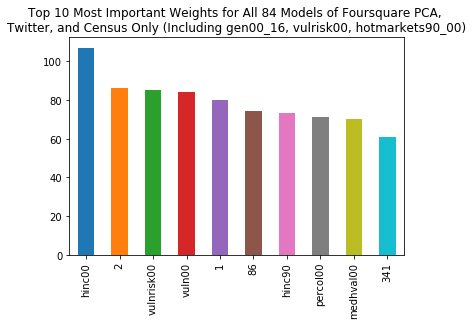

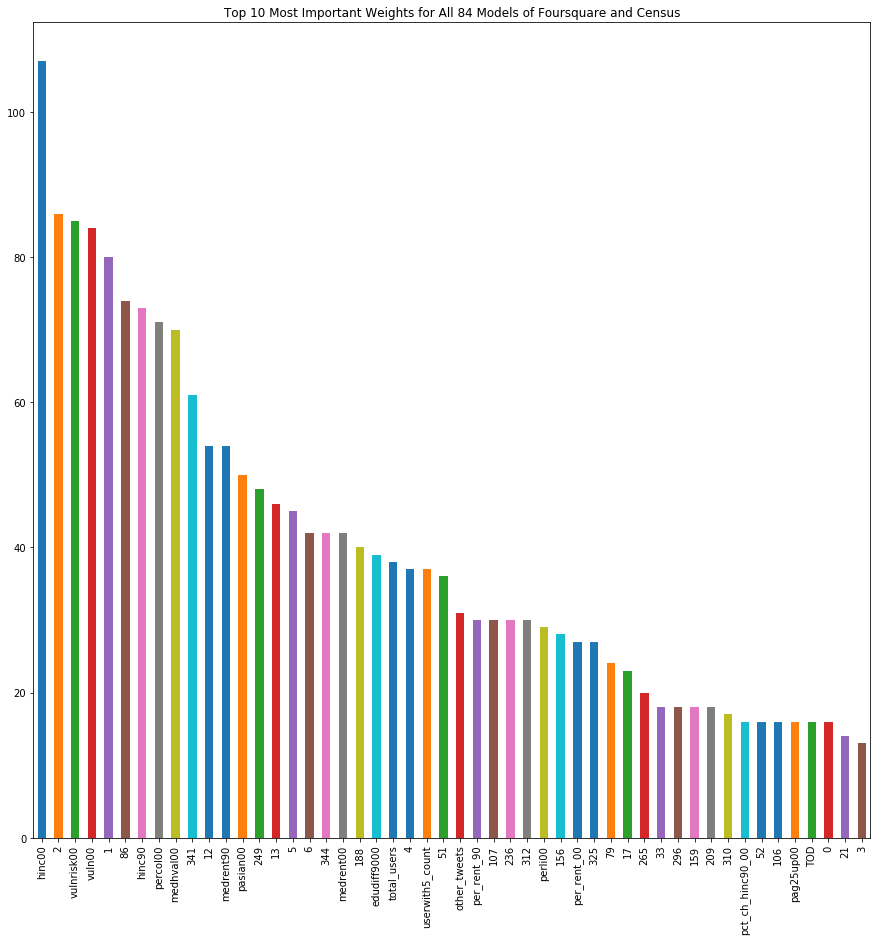

In [27]:
print(top10_pd.sum(axis=0).sort_values(ascending=False)[:10])
top10_pd.sum(axis=0).sort_values(ascending=False)[:10].plot(kind='bar', title = 'Top 10 Most Important Weights for All 84 Models of Foursquare PCA, \nTwitter, and Census Only (Including gen00_16, vulrisk00, hotmarkets90_00)')
plt.show()
top10_pd.sum(axis=0).sort_values(ascending=False)[:50].plot(kind='bar', figsize = (15,15), title = 'Top 10 Most Important Weights for All 84 Models of Foursquare and Census')

In [ ]:
# top10_pd = pd.DataFrame():
# for binary_variable in binary_variables:
#     top10_pd[binary_variable] = weights_df[0].loc[0][1:].abs().sort_values(ascending=False)[:10].index